In [15]:
from LabelPropagation import LabelPropagation as LP
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
dataX,dataY=datasets.make_blobs(n_samples=10, n_features=5, centers=2, cluster_std=1.5, center_box=(-10.0, 10.0), shuffle=True, random_state=None)

In [39]:
def labelremover(X,y):
    newX1 = np.around(X,decimals=2)
    newY1=np.copy(y)
    dim = X.shape[1]
    points = np.array(np.empty(len(np.unique(y))))
    knownX = np.empty((len(points),dim))
    knownY = np.empty(len(points))
    for i in np.unique(y):
        points[i] = np.where(y==(i))[0][0]
    for j in np.arange(0,len(newY1)):
        newY1[j]=-1
    for k in np.unique(y):
        newY1[points[k]] = y[points[k]]
    knownX = X[[i for i in points]]
    knownY = y[[i for i in points]]
    print "These are labels of known points: "+ str(knownY)
    return (newY1, knownX, knownY)

trainX = dataX[0:7,:]
trainY = dataY[0:7]
testX = dataX[7:10,:]
testY = dataY[7:10]


In [40]:
newtrainY, knownX, knownY = labelremover(trainX,trainY)

These are labels of known points: [0 1]


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:13: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:14: VisibleDeprecationWarning: non integer (and non boolean) array-likes will not be accepted as indices in the future
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:15: VisibleDeprecationWarning: non integer (and non boolean) array-likes will not be accepted as indices in the future


In [41]:
knownX,knownY

(array([[ 10.47252373,   1.6545222 ,  -9.7187857 ,   4.78867145,   7.1002401 ],
        [ -7.02805056,  -7.0689031 ,   2.43758917,   2.33274578,
          -3.43692873]]), array([0, 1]))

In [42]:
lp = LP()
X = trainX
y = newtrainY

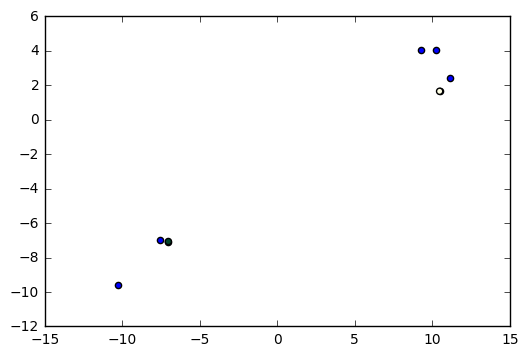

In [43]:
#Data before PCA
plt.scatter(X[:,0], X[:,1])
plt.scatter(knownX[:,0], knownX[:,1], c=knownY,cmap=(('YlGn')) )
plt.show()
    

In [44]:
n,classes = lp.getParams(X,y)
rotatedData = lp.rotate(X)

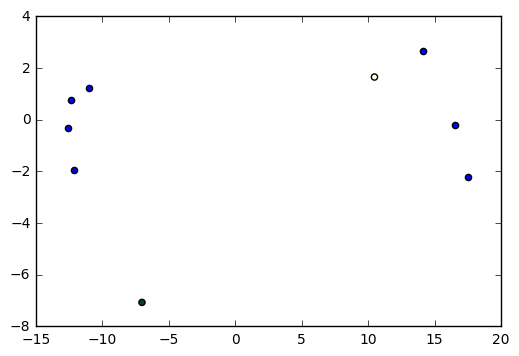

In [45]:
#Data after PCA
plt.scatter(rotatedData[:,0], rotatedData[:,1])
plt.scatter(knownX[:,0], knownX[:,1], c=knownY,cmap=(('YlGn')) )
plt.show()
    

In [48]:
#angles between rotated components
import math

def dotproduct(v1, v2):
    return sum((a*b) for a, b in zip(v1, v2))

def length(v):
    return math.sqrt(dotproduct(v, v))

def angle(v1, v2):
    return math.acos(dotproduct(v1, v2) / (length(v1) * length(v2)))
print "for original data:"
for i in range(lp.dimensions-1):
    print "angle between "+str(i)+" and "+ str(i+1)+" is: " + str(angle(trainX[:,i],trainX[:,i+1]) * (180/math.pi))
print
print "for rotated data:"
for i in range(lp.dimensions-1):
    print "angle between "+str(i)+" and "+ str(i+1)+" is: " + str(angle(rotatedData[:,i],rotatedData[:,i+1]) * (180/math.pi))

for original data:
angle between 0 and 1 is: 32.3802486339
angle between 1 and 2 is: 116.745075143
angle between 2 and 3 is: 150.282726107
angle between 3 and 4 is: 60.0622211083

for rotated data:
angle between 0 and 1 is: 90.0
angle between 1 and 2 is: 90.0
angle between 2 and 3 is: 90.0
angle between 3 and 4 is: 90.0


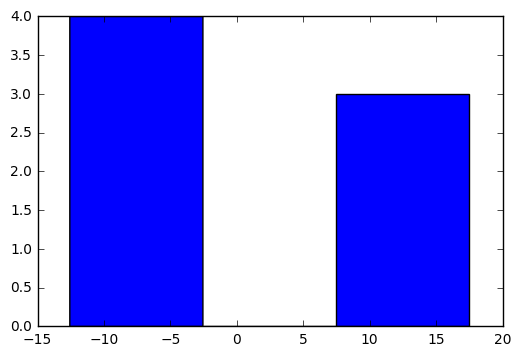

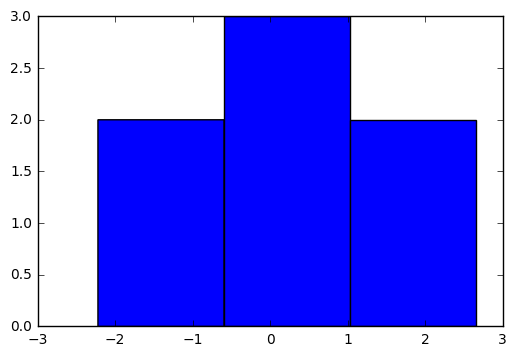

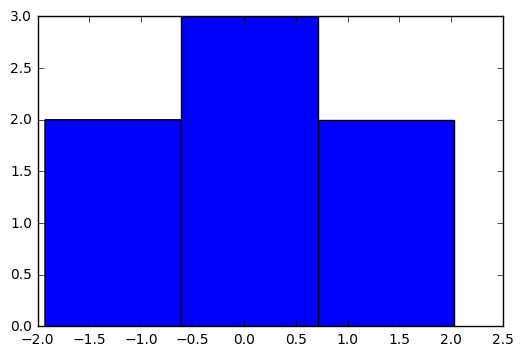

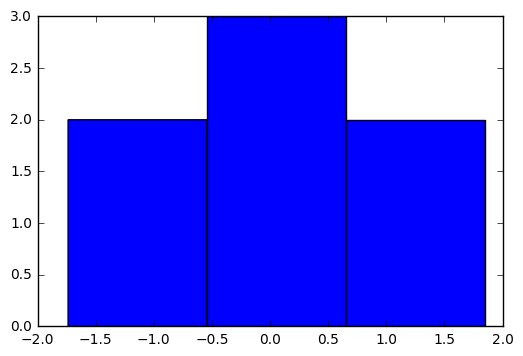

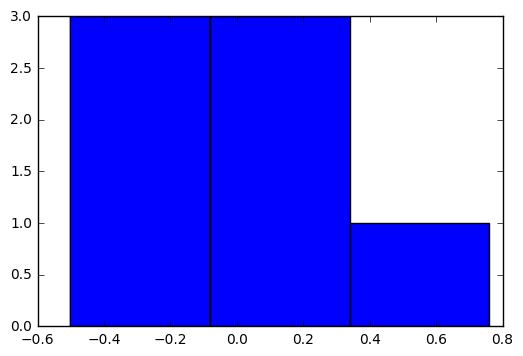

In [49]:
#Histograms for k dimensions
for i in range(lp.dimensions):
    histograms, binEdges = lp.approximateDensities(i, rotatedData)
    plt.hist(rotatedData[:,i], bins=lp.numBins)
    plt.show()


In [50]:
newsig,lp.newg,lp.newEdgeMeans = lp.getKSmallest(rotatedData)
approxValues = lp.transformer(rotatedData)
lp.alpha = lp.getAlpha(approxValues, y, n, newsig)
efunctions = lp.solver(approxValues)
